# Tutorial on Cpl_graphs showComparisonPlot()

In [1]:
%matplotlib inline
import numpy as np
import sys, os

In [2]:
# Import cpl_graphs.py 
import cpl_graphs

# Table of Contents
0. [Introduction](#Section0)
1. [A first example: comparison of 2 time series](#Section1)
2. [Comparison of 3 times series](#Section2)
3. [Difference of 2 times series](#Section3)
4. [Handling missing data](#Section4)

## Introduction <a name="Section0"></a>

The function showComparisonPlot() creates comparison plots between results for a list of bands/products. It can also be used to plot differences/errors between results.

Its signature is the following:
- yValuesPairLst         (array of float)        list of pairs of y-values
- plotInfoDic            (dictionary)            dictionary containing plot settings
- savePath               (string)                path to store figure
def showComparisonPlot(yValuesPairLst, plotInfoDic, savePath='')

The creation of plots using showComparisonPlot() relies on the creation of a dictionary plotInfoDic to set the plot attributes (title, axes labels, legend, colours, etc...)

Here is the keys list:
- 'colorLst'          : a list of colours and marks, 1 item per result to be displayed e.g. ['b*', 'r']                   
- 'legendLst'         : a list of labels, 1 per result e.g.['Result1', 'Result2']         
- 'xTicksValues'      : array of x-values to be shown on graphs (same length as results)                      
- 'xTicksValuesStep'  : step between 2 x-ticks e.g.1                             
- 'xTicksOrientation' : orientation of x ticks e.g.0 for horizontal, 90 for vertical                 
- 'title'             : plot title e.g.'This is a title,                             
- 'xLabel'            : x label e.g.'Dates',                           
- 'yLabel'            : y label


## A first example: comparison of 2 time series <a name="Section1"></a>

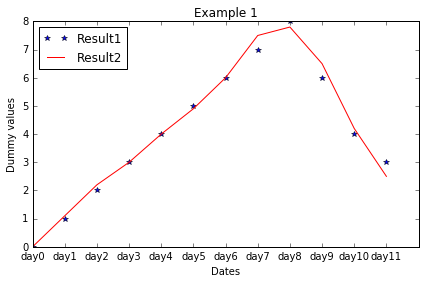

In [3]:
# Create 2 dummy time series to be compared
result1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 6, 4, 3])
result2 = np.array([0, 1.1, 2.2, 3, 4, 4.9, 6, 7.5, 7.8, 6.5, 4.2, 2.5])
# Create a pair out of them
resultLst = [result1, result2]
# Define the x-ticks values
xticksValues = ['day'+str(d) for d in xrange(len(result1))]

# Set dummy plot attributes
xstep = 1
xticksOrientation = 0        
title = 'Example 1'

plotInfoDic = {'colorLst'          : ['b*', 'r'],                       \
               'legendLst'         : ['Result1', 'Result2'],            \
               'xTicksValues'      : xticksValues,                      \
               'xTicksValuesStep'  : xstep,                             \
               'xTicksOrientation' : xticksOrientation,                 \
               'title'             : title,                             \
               'xLabel'            : 'Dates',                           \
               'yLabel'            : 'Dummy values'
}
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic, savePath='')

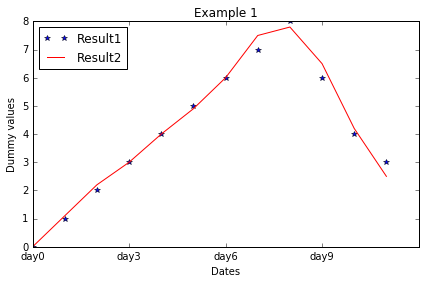

In [4]:
plotInfoDic['xTicksValuesStep'] = 3
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

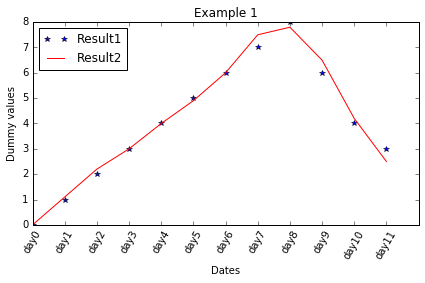

In [5]:
plotInfoDic['xTicksValuesStep'] = 1
plotInfoDic['xTicksOrientation'] = 60
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

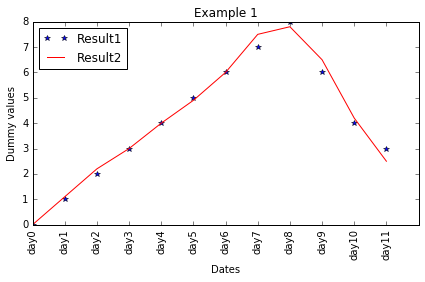

In [6]:
plotInfoDic['xTicksOrientation'] = 90
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

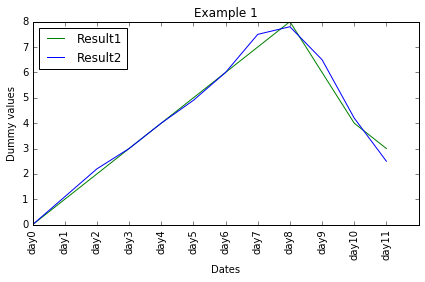

In [7]:
plotInfoDic['colorLst'] = ['g', 'b']
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

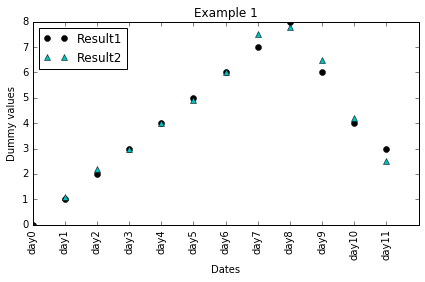

In [8]:
plotInfoDic['colorLst'] = ['ko', 'c^']
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

## Comparison of 3 times series <a name="Section2"></a>

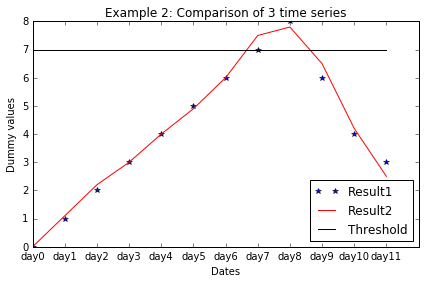

In [9]:
# Create 2 dummy time series to be compared
result1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 6, 4, 3])
result2 = np.array([0, 1.1, 2.2, 3, 4, 4.9, 6, 7.5, 7.8, 6.5, 4.2, 2.5])
result3 = np.array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,7, 7])
# Create a tuple out of them
resultLst = [result1, result2, result3]
# Define the x-ticks values
xticksValues = ['day'+str(d) for d in xrange(len(result1))]

# Set dummy plot attributes
xstep = 1
xticksOrientation = 0        
title = 'Example 2: Comparison of 3 time series'

plotInfoDic = {'colorLst'          : ['b*', 'r', 'k'],                      \
               'legendLst'         : ['Result1', 'Result2', 'Threshold'],   \
               'xTicksValues'      : xticksValues,                          \
               'xTicksValuesStep'  : xstep,                                 \
               'xTicksOrientation' : xticksOrientation,                     \
               'title'             : title,                                 \
               'xLabel'            : 'Dates',                               \
               'yLabel'            : 'Dummy values'
}
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic, savePath='')

## Difference of 2 times series <a name="Section3"></a>

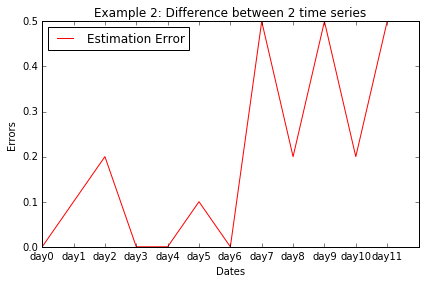

In [10]:
# Create 2 dummy time series to be compared
diffResult = abs(result1 - result2)

# Create a tuple out of them
resultLst = [diffResult]

# Set dummy plot attributes  
title = 'Example 2: Difference between 2 time series'

plotInfoDic = {'colorLst'          : ['r'],                 \
               'legendLst'         : ['Estimation Error'],  \
               'xTicksValues'      : xticksValues,          \
               'xTicksValuesStep'  : xstep,                 \
               'xTicksOrientation' : xticksOrientation,     \
               'title'             : title,                 \
               'xLabel'            : 'Dates',               \
               'yLabel'            : 'Errors'
}
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

## Handling missing data <a name="Section4"></a>

Sometimes you may have results with missing data (e.g. with value = 255). 

In [11]:
result1 = np.array([0, 1.1, 255, 3,  255, 5, 6, 7.2, 8, 6, 4, 3])
result2 = np.array([0, 1.4, 2.5, 3.3, 4, 4.9, 6, 7.5, 7.8, 255, 255, 2.5])
resultLst = [result1, result2]
title = 'Example where Missing Data values pollute graph analysis'
plotInfoDic = {'colorLst'          : ['b*-', 'ro-'],                    \
               'legendLst'         : ['Result1', 'Result2'],            \
               'xTicksValues'      : xticksValues,                      \
               'xTicksValuesStep'  : xstep,                             \
               'xTicksOrientation' : xticksOrientation,                 \
               'title'             : title,                             \
               'xLabel'            : 'Dates',                           \
               'yLabel'            : 'Dummy values'
}


Plotting these missing values will pollute your plot, scaling down the differences in your results, and as a consequence preventing you for performing a proper analysis. 

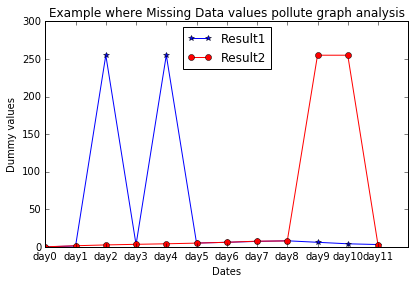

In [12]:
cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)

A good solution to avoid that is to mask the missing data with numpy NaN values.
These NaN values will not be shown on graph so you don't have anything to worry about, not even removing the x-values associated to to the y-missing-data. 

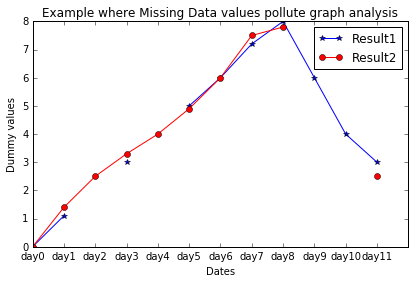

In [13]:
# Use np.NaN to mask missing data
missingData = 255
result1[result1==missingData] = np.NaN
result2[result2==missingData] = np.NaN
resultLst = [result1, result2]
title = 'Example where Missing Data values are removed from graph by setting them to NaN'

cpl_graphs.showComparisonPlot(resultLst, plotInfoDic)